# Convolutional Neural Networks (CNNs)

In deep learning, CNNs are particularly effective for tasks involving image data (2D) and time series data (1D).

CNNs are designed to automatically and adaptively learn spatial hierarchies of features from the input images.



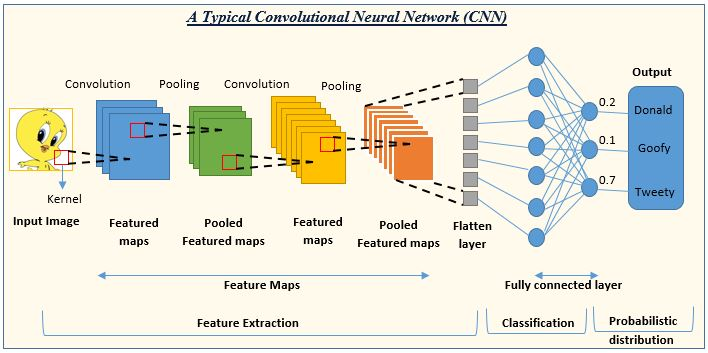

## Key components related to CNNs:


* **Convolutional Layers**: The building blocks of CNNs, convolutional layers apply convolution operations to the input image. These operations involve sliding a small filter (also known as a kernel) over the input image to extract features such as edges, textures, and patterns.

 - Each filter in a convolutional layer learns to detect a specific feature within its receptive field.

* **Pooling Layers**: Pooling layers downsample the feature maps produced by the convolutional layers, reducing their spatial dimensions while retaining the most important information. Max pooling, Global pooling and average pooling are common pooling operations used in CNNs.

* **Activation Functions**: Activation functions introduce non-linearity into the CNN, allowing the model to learn complex relationships between the input and output. Common activation functions include ReLU (Rectified Linear Unit) and tanh.

* **Fully Connected Layers**: Fully connected (or dense) layers connect every neuron in one layer to every neuron in the next layer, enabling the model to perform high-level reasoning and classification based on the learned features.

* **Training with Backpropagation**: CNNs are trained using the backpropagation algorithm, which adjusts the weights/bais of the network to minimize the difference between the predicted output and the ground truth labels.

  - This process involves forward propagation to compute predictions, followed by backward propagation to compute gradients and update the weights using optimization algorithms such as stochastic gradient descent (SGD), Adam, or RMSprop.

* **Pretrained Models and Transfer Learning**: Pretrained CNN models, such as VGGNET, ResNet, and MobileNet, have been trained on large datasets like ImageNet and can be used as feature extractors or fine-tuned for specific tasks with limited data.
  - Transfer learning involves leveraging the learned representations from these pretrained models to improve performance on new tasks.

## CNN Model Implementation

## Importing Dataset:

In [1]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

## Generators


To batch wise upload data to system.

In [2]:
# Training Data

train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# Validation Data
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.




## Normalize

The images are stored in numpy array format (0-255), to which we need to normalize btw (0-1)

In [3]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## CNN Model

-- To reduce overfitting we will use:

* Dropout
* Batch Normalization


In [4]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

C:\Users\HP\anaconda3\envs\abhijitg_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6248 - loss: 4.8824 - val_accuracy: 0.5000 - val_loss: 28.1077
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8220 - loss: 1.2094 - val_accuracy: 0.5000 - val_loss: 32.1242
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8925 - loss: 0.7117 - val_accuracy: 0.5000 - val_loss: 27.3527
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9188 - loss: 0.3280 - val_accuracy: 0.6150 - val_loss: 5.4540
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9392 - loss: 0.2717 - val_accuracy: 0.7720 - val_loss: 1.6060
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9704 - loss: 0.1179 - val_accuracy: 0.7320 - val_loss: 1.6360
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9836 - loss: 0.0558 - val_accuracy: 0.7130 - val_loss: 2.5336
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9721 - loss: 0.1562 - val_accuracy: 0.8080 - val_lo

Upon careful analysis, it's noted that while the training accuracy is 97%, the validation accuracy is only 79.56% may indicate overfitting within the system.

Let's plot graphs to validate this observation!

In [8]:
import matplotlib.pyplot as plt

## Train VS Validation Accuracy


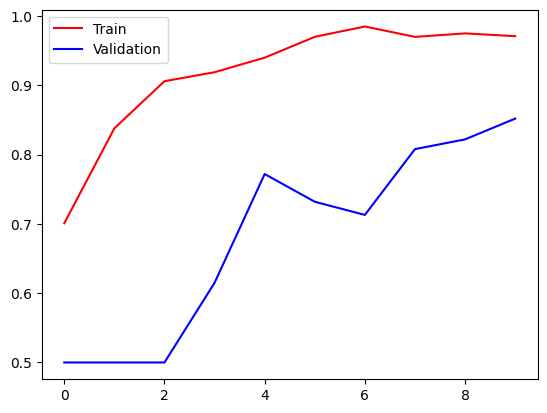

In [9]:
plt.plot(history.history['accuracy'],color='red',label='Train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.legend()
plt.show()

## Train VS Validation Loss


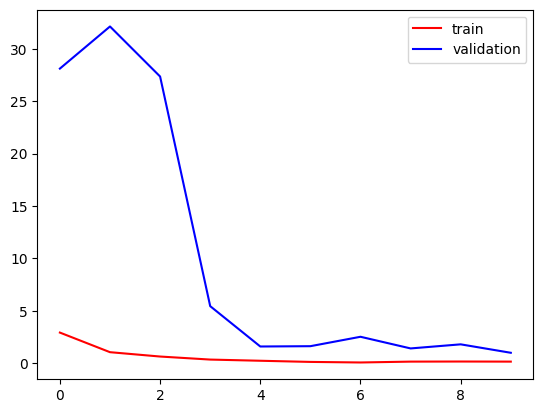

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Let do testing on unseen data!

## Test for Dog!

In [11]:
import cv2

In [12]:
test_img = cv2.imread('dog.jpg')

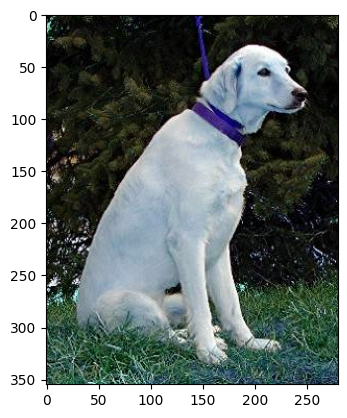

In [13]:
plt.imshow(test_img)

In [14]:
test_img.shape

(355, 280, 3)

In [15]:
test_img = cv2.resize(test_img,(256,256))

In [16]:
test_input = test_img.reshape((1,256,256,3))

In [17]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


array([[0.]], dtype=float32)

## Test for Cat!

In [18]:
test_img1 = cv2.imread('cat.jpg')

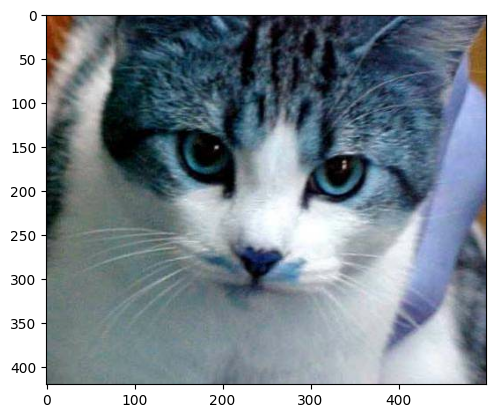

In [19]:
plt.imshow(test_img1)

In [20]:
test_img1 = cv2.resize(test_img1,(256,256))

In [21]:
test_input1 = test_img1.reshape((1,256,256,3))

In [22]:
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[0.]], dtype=float32)

Despite exhibiting signs of overfitting, our model demonstrates proficiency in object classification.




